In [5]:
import sys
import os
import rootpath
sys.path.append(rootpath.detect())

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
def load(p):
    with open(p, "rb") as infile:
        return pickle.load(infile)

In [8]:
path = os.path.join(rootpath.detect(), "experiments/data/saf_directed/wfg6_2obj_6dim/log_data/OF_objective_function__opt_DirectedSaf__ninit_10__surrogate_MultiSurrogateGP__ei_False__target_2p09_1p35__w_0p5")
paths = [os.path.join(path, p) for p in os.listdir(path) if p[-9:] != "model.pkl"]
dsaf_results = [load(p) for p in paths]

In [10]:
path = os.path.join(rootpath.detect(), "experiments/data/dParEgo/wfg6_2obj_6dim/log_data/OF_objective_function__opt_DirectedParEgo__ninit_10__target_2p09_1p35__rho_0p05__s_5")
paths = [os.path.join(path, p) for p in os.listdir(path) if p[-9:] != "model.pkl"]
parego_results = [load(p) for p in paths]

In [13]:
t = dsaf_results[0]["targets"]

In [75]:
seed_n = 8
r_saf = dsaf_results
r_par = parego_results
r_saf = [r_saf[i] for i in np.argsort([r["seed"] for r in r_saf])][seed_n]
r_par = [r_par[i] for i in np.argsort([r["seed"] for r in r_par])][seed_n]
assert r_saf["seed"] == r_par["seed"]

In [76]:
y_saf = r_saf["y"][:20]
y_par = r_par["y"][:20]

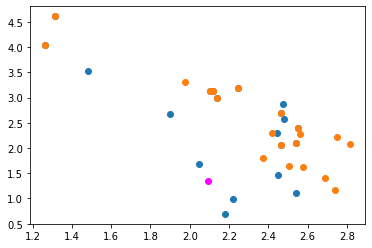

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()

ax.scatter(*y_saf.T, c="C0")
ax.scatter(*y_par.T, c="C1")
ax.scatter(*t.T, c="magenta")